In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype']=42
import seaborn as sns
import numpy as np


In [2]:
import sys
sys.path.append('../../')
from consensus_variables import *

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# File path
file_path = f"{deepcsa_run_dir}/mutatedcellsfromvafam/covered_genomes_cells.genewise.grouped.tsv"

# Load data from the file
mutated_cells_df = pd.read_csv(file_path, sep="\t")
mutated_cells_df["CLEAN_SAMPLE_ID"] = mutated_cells_df["SAMPLE_ID"].map(old2new_sample_names)

In [5]:
mutated_cells_df

,SAMPLE,gene,chr,GENOMES_SNV_AM_TOTAL,GENOMES_SNV_AM_UPPER,GENOMES_SNV_AM_MEAN,GENOMES_SNV_AM_LOWER,GENOMES_INDEL_AM_TOTAL,GENOMES_SNV_ND_TOTAL,GENOMES_SNV_ND_UPPER,GENOMES_SNV_ND_MEAN,GENOMES_SNV_ND_LOWER,SAMPLE_ID,SEX,CELLS_DOUBLE_HIT_SNV_AM_LOWER,CELLS_SINGLE_HIT_SNV_AM_LOWER,CELLS_DOUBLE_HIT_SNV_AM_MEAN,CELLS_SINGLE_HIT_SNV_AM_MEAN,CELLS_DOUBLE_HIT_SNV_AM_UPPER,CELLS_SINGLE_HIT_SNV_AM_UPPER,CELLS_DOUBLE_HIT_SNV_AM_TOTAL,CELLS_SINGLE_HIT_SNV_AM_TOTAL,CELLS_DOUBLE_HIT_SNV_ND_LOWER,CELLS_SINGLE_HIT_SNV_ND_LOWER,CELLS_DOUBLE_HIT_SNV_ND_MEAN,CELLS_SINGLE_HIT_SNV_ND_MEAN,CELLS_DOUBLE_HIT_SNV_ND_UPPER,CELLS_SINGLE_HIT_SNV_ND_UPPER,CELLS_DOUBLE_HIT_SNV_ND_TOTAL,CELLS_SINGLE_HIT_SNV_ND_TOTAL,CELLS_DOUBLE_HIT_INDEL_AM_TOTAL,CELLS_SINGLE_HIT_INDEL_AM_TOTAL,CLEAN_SAMPLE_ID
0,P19_0001_BDO_01,ARID1A,chr1,0.000929,0.000768,0.000684,0.000000,0.000878,0.000269,0.000000,0.000000,0.000000,P19_0001_BDO_01,M,0.000000,0.000000,0.000684,0.001369,0.000768,0.001535,0.000929,0.001858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000269,0.000537,0.000878,0.001756,01_DO
1,P19_0001_BDO_01,CDKN1A,chr6,0.000090,0.000000,0.000000,0.000000,0.000335,0.000000,0.000000,0.000000,0.000000,P19_0001_BDO_01,M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000090,0.000180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000335,0.000669,01_DO
2,P19_0001_BDO_01,CREBBP,chr16,0.000098,0.000000,0.000000,0.000000,0.000267,0.000000,0.000000,0.000000,0.000000,P19_0001_BDO_01,M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000098,0.000196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000267,0.000534,01_DO
3,P19_0001_BDO_01,EP300,chr22,0.000365,0.000279,0.000097,0.000000,0.000354,0.000000,0.000000,0.000000,0.000000,P19_0001_BDO_01,M,0.000000,0.000000,0.000097,0.000195,0.000279,0.000558,0.000365,0.000731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000354,0.000708,01_DO
4,P19_0001_BDO_01,FGFR3,chr4,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P19_0001_BDO_01,M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000116,0.000233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,01_DO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,P19_0053_BTR_01,PIK3CA,chr3,0.000047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P19_0053_BTR_01,M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000047,0.000094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53_TR
1382,P19_0053_BTR_01,RB1,chr13,0.001359,0.001322,0.001278,0.000000,0.000181,0.001078,0.000684,0.000684,0.000000,P19_0053_BTR_01,M,0.000000,0.000000,0.001278,0.002555,0.001322,0.002644,0.001359,0.002719,0.000000,0.000000,0.000684,0.001368,0.000684,0.001368,0.001078,0.002156,0.000181,0.000363,53_TR
1383,P19_0053_BTR_01,RBM10,chrX,0.004208,0.004052,0.003885,0.003712,0.015934,0.015904,0.015630,0.015490,0.015342,P19_0053_BTR_01,M,0.003712,0.003712,0.003885,0.003885,0.004052,0.004052,0.004208,0.004208,0.015342,0.015342,0.015490,0.015490,0.015630,0.015630,0.015904,0.015904,0.015934,0.015934,53_TR
1384,P19_0053_BTR_01,STAG2,chrX,0.000102,0.000000,0.000000,0.000000,0.000191,0.000000,0.000000,0.000000,0.000000,P19_0053_BTR_01,M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000102,0.000102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000191,0.000191,53_TR


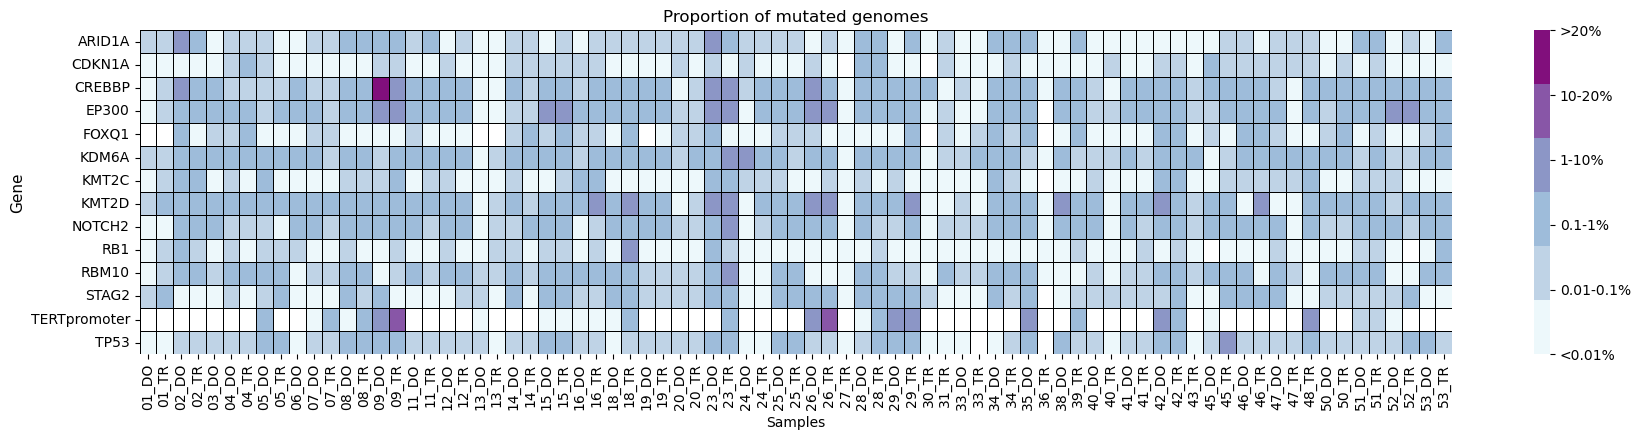

In [6]:
df = mutated_cells_df

# Filter for specific genes
selected_genes = ['TP53', 'TERTpromoter','KDM6A', 'CDKN1A', 'FOXQ1', 'EP300', 'ARID1A', 'KMT2D', 'KMT2C','CREBBP', 'RB1', 'RBM10', 'NOTCH2', 'CDKN1A','STAG2']
df_filtered = df[df["gene"].isin(selected_genes)]

# Pivot table for heatmap
heatmap_data = df_filtered.pivot(index="gene", columns="CLEAN_SAMPLE_ID", values="CELLS_DOUBLE_HIT_SNV_AM_MEAN")

bins = [-np.inf, 0.0001, 0.001, 0.01, 0.1, 0.2, 1]


#labels = ["<0.001", "0.001-0.01", "0.01-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-1"] # 7 groups
labels = ["<0.01%", "0.01-0.1%", "0.1-1%", "1-10%", "10-20%", ">20%"] # 6 groups

# # Define categorical bins and colors
# bins = [-np.inf, 0.001, 0.01, 0.1, 0.2, 0.3, 1]


# #labels = ["<0.001", "0.001-0.01", "0.01-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-1"] # 7 groups
# labels = ["<0.001", "0.001-0.01", "0.01-0.1", "0.1-0.2", "0.2-0.3", ">0.3"] # 6 groups
#colors = ["#F7FBFF", "#DEEBF7", "#9ECAE1", "#6BAED6", "#3182BD", "#08519C"]  # Blue shades
#colors = ["#F2F0F7", "#DADAEB", "#BCBDDC", "#9E9AC8", "#807DBA", "#6A51A3", "#4A1486"]  # Violate shades
#colors = ["#EDF8FB", "#BFD3E6", "#9EBCDA", "#8C96C6", "#8C6BB1", "#88419D", "#6E016B"]  # two colors violate and blue - 7
colors = ["#EDF8FB", "#BFD3E6", "#9EBCDA", "#8C96C6", "#8856A7", "#810F7C"]  # two colors violate and blue - 6


# Assign categories
heatmap_categorical = pd.cut(heatmap_data.stack(), bins=bins, labels=range(len(labels))).unstack()
# Convert to float (fix TypeError issue)
heatmap_categorical = heatmap_categorical.astype(float)
# Create the heatmap
fig, ax = plt.subplots(figsize=(18, 4.5))
cmap = sns.color_palette(colors, as_cmap=True)
sns.heatmap(heatmap_categorical, cmap=cmap, linewidths=0.5, linecolor="black",
            cbar=True, ax=ax, mask=heatmap_categorical.isnull(), annot=False)  # annot=False removes cell values
# Set color bar labels manually
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(np.arange(len(labels)))
colorbar.set_ticklabels(labels)
# Set title and labels
plt.title("Proportion of mutated genomes")
plt.ylabel("Gene", fontsize = 11)
plt.xlabel("Samples")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
# Show plot
plt.savefig("plots/ExtendedFig5c_heatmap.png", dpi = 300)
plt.show()